Сегодня мы поговорим о морфологических анализаторах для русского языка и некоторых других языков.  

http://web-corpora.net/wsgi/mystemplus.wsgi/mystemplus/compare_table/ сравнение тэггеров.  

Не забудьте установить нужные библиотеки.

In [ ]:
!pip install pymystem3

In [ ]:
import re

In [ ]:
text_rus = '''И пунша пламень голубой.
Люблю воинственную живость
Потешных Марсовых полей,
Пехотных ратей и коней
Однообразную красивость,
В их стройно зыблемом строю
Лоскутья сих знамён победных,
Сиянье шапок этих медных,
Насквозь простреленных в бою.'''

Токенизация через nltk:

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
text_tokens_nltk = word_tokenize(text_rus)
print(text_tokens_nltk)

['И', 'пунша', 'пламень', 'голубой', '.', 'Люблю', 'воинственную', 'живость', 'Потешных', 'Марсовых', 'полей', ',', 'Пехотных', 'ратей', 'и', 'коней', 'Однообразную', 'красивость', ',', 'В', 'их', 'стройно', 'зыблемом', 'строю', 'Лоскутья', 'сих', 'знамён', 'победных', ',', 'Сиянье', 'шапок', 'этих', 'медных', ',', 'Насквозь', 'простреленных', 'в', 'бою', '.']


Mystem -- свободно распространяемая библиотека с закрытым кодом. Майстем сам умеет токенизировать. Он устанавливает словарную форму (лемму), определяет часть речи и даёт разную морфологическую информацию, при этом выбирая один из наиболее вероятных разборов.

In [ ]:
from pymystem3 import Mystem

# сохраняем класс в переменную
mystem = Mystem()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
text_analyzed = mystem.analyze(text_rus)
text_analyzed

[{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'},
 {'text': ' '},
 {'analysis': [{'lex': 'пунш', 'wt': 1, 'gr': 'S,муж,неод=род,ед'}],
  'text': 'пунша'},
 {'text': ' '},
 {'analysis': [{'lex': 'пламень',
    'wt': 1,
    'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}],
  'text': 'пламень'},
 {'text': ' '},
 {'analysis': [{'lex': 'голубой',
    'wt': 0.9983341496,
    'gr': 'A=(вин,ед,полн,муж,неод|им,ед,полн,муж|пр,ед,полн,жен|дат,ед,полн,жен|род,ед,полн,жен|твор,ед,полн,жен)'}],
  'text': 'голубой'},
 {'text': '.'},
 {'text': '\n'},
 {'analysis': [{'lex': 'любить',
    'wt': 1,
    'gr': 'V,несов,пе=непрош,ед,изъяв,1-л'}],
  'text': 'Люблю'},
 {'text': ' '},
 {'analysis': [{'lex': 'воинственный', 'wt': 1, 'gr': 'A=вин,ед,полн,жен'}],
  'text': 'воинственную'},
 {'text': ' '},
 {'analysis': [{'lex': 'живость', 'wt': 1, 'gr': 'S,жен,неод=(вин,ед|им,ед)'}],
  'text': 'живость'},
 {'text': '\n'},
 {'analysis': [{'lex': 'потешный',
    'wt': 1,
    'gr': 'A=(пр,мн,пол

In [ ]:
print(text_analyzed[4])

{'analysis': [{'lex': 'пламень', 'wt': 1, 'gr': 'S,неод=(им,ед,муж|вин,ед,муж)'}], 'text': 'пламень'}


In [ ]:
print(type(text_analyzed))

<class 'list'>


Можно делать отдельные вещи:

In [ ]:
text_lemmatized = mystem.lemmatize(text_rus)
print(text_lemmatized)

['и', ' ', 'пунш', ' ', 'пламень', ' ', 'голубой', '.', '\n', 'любить', ' ', 'воинственный', ' ', 'живость', '\n', 'потешный', ' ', 'марсовой', ' ', 'поле', ',\n', 'пехотный', ' ', 'рать', ' ', 'и', ' ', 'конь', '\n', 'однообразный', ' ', 'красивость', ',\n', 'в', ' ', 'их', ' ', 'стройно', ' ', 'зыбить', ' ', 'строй', '\n', 'лоскут', ' ', 'сей', ' ', 'знамя', ' ', 'победный', ',\n', 'сияние', ' ', 'шапка', ' ', 'этот', ' ', 'медный', ',\n', 'насквозь', ' ', 'прострелить', ' ', 'в', ' ', 'бой', '.', '\n']


Можно склеить всё в один лемматизированный текст:

In [ ]:
new_text_lemmatized = ''.join(text_lemmatized)
print(new_text_lemmatized)

и пунш пламень голубой.
любить воинственный живость
потешный марсовой поле,
пехотный рать и конь
однообразный красивость,
в их стройно зыбить строй
лоскут сей знамя победный,
сияние шапка этот медный,
насквозь прострелить в бой.



In [ ]:
# сделаем все красиво с индексами и доступом по ключам

print('Слово - ', text_analyzed[0]['text'])
print('Разбор слова - ', text_analyzed[0]['analysis'][0])
print('Лемма слова - ', text_analyzed[0]['analysis'][0]['lex'])
print('Грамматическая информация слова2 - ', text_analyzed[0]['analysis'][0]['gr'])

Слово -  И
Разбор слова -  {'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}
Лемма слова -  и
Грамматическая информация слова2 -  CONJ=


In [ ]:
text_analyzed[0] #чтобы понять, что происходит наверху

{'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'И'}

Функция, чтобы прикрепить частеречные теги к словам

In [ ]:
def process_mystem_analysis(analysis_results):
    """
    Преобразует результаты анализа mystem в список токенов формата "слово_ЧастьРечи"

    Параметры:
    analysis_results (list): Результат работы метода mystem.analyze()

    Возвращает:
    list: Список строк в формате "слово_ЧастьРечи"
    """
    result_tokens = []

    for item in analysis_results:
        # Пропускаем пробелы и знаки препинания
        if item.get('text', '').strip() == '' or 'analysis' not in item:
            continue

        # Получаем текст токена
        token_text = item['text'].lower()

        # Если есть анализ и он не пустой
        if 'analysis' in item and item['analysis']:
            # Берем первый (наиболее вероятный) вариант анализа
            first_analysis = item['analysis'][0]

            # Извлекаем часть речи из поля 'gr'
            if 'gr' in first_analysis:
                # Извлекаем первую часть до запятой или знака равенства
                pos_tag = first_analysis['gr'].split(',')[0].split('=')[0]

                # Формируем токен в формате "слово_ЧастьРечи"
                formatted_token = f"{token_text}_{pos_tag}"
                result_tokens.append(formatted_token)
            else:
                # Если нет информации о части речи, добавляем просто слово
                result_tokens.append(token_text)
        else:
            # Если нет анализа, добавляем просто слово
            result_tokens.append(token_text)

    return result_tokens

In [ ]:
# Преобразование в список токенов
tagged_tokens = process_mystem_analysis(text_analyzed)

# Вывод результата
print(" ".join(tagged_tokens))

и_CONJ пунша_S пламень_S голубой_A люблю_V воинственную_A живость_S потешных_A марсовых_S полей_S пехотных_A ратей_S и_CONJ коней_S однообразную_A красивость_S в_PR их_APRO стройно_ADV зыблемом_V строю_S лоскутья_S сих_APRO знамён_S победных_A сиянье_S шапок_S этих_APRO медных_A насквозь_ADV простреленных_V в_PR бою_S


Можно посмотреть предсказания для отдельных слов:

In [ ]:
mystem.analyze('стекла')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': '\n'}]

In [ ]:
mystem.analyze('стали')

[{'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

In [ ]:
mystem.analyze('стекла и стали нам не хватает')

[{'analysis': [{'lex': 'стекло',
    'wt': 0.9946103594,
    'gr': 'S,сред,неод=(вин,мн|род,ед|им,мн)'}],
  'text': 'стекла'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=дат'}],
  'text': 'нам'},
 {'text': ' '},
 {'analysis': [{'lex': 'не', 'wt': 1, 'gr': 'PART='}], 'text': 'не'},
 {'text': ' '},
 {'analysis': [{'lex': 'хватать',
    'wt': 1,
    'gr': 'V,несов=(непрош,ед,изъяв,3-л|непрош,изъяв)'}],
  'text': 'хватает'},
 {'text': '\n'}]

In [ ]:
mystem.analyze('кринжевать')

[{'analysis': [{'lex': 'кринжевать',
    'wt': 0.1624500426,
    'qual': 'bastard',
    'gr': 'V,несов,пе=инф'},
   {'lex': 'кринжевать',
    'wt': 0.1612166906,
    'qual': 'bastard',
    'gr': 'V,несов,нп=инф'}],
  'text': 'кринжевать'},
 {'text': '\n'}]

In [ ]:
mystem.analyze('Глокая куздра штеко будланула бокра и курдячит бокрёнка')

[{'analysis': [{'lex': 'глокай',
    'wt': 0.09304979929,
    'qual': 'bastard',
    'gr': 'S,муж,неод=род,ед'}],
  'text': 'Глокая'},
 {'text': ' '},
 {'analysis': [{'lex': 'куздра',
    'wt': 0.6292693823,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'куздра'},
 {'text': ' '},
 {'analysis': [{'lex': 'штеко',
    'wt': 0.2574119755,
    'qual': 'bastard',
    'gr': 'ADV='}],
  'text': 'штеко'},
 {'text': ' '},
 {'analysis': [{'lex': 'будланул',
    'wt': 0.03753661836,
    'qual': 'bastard',
    'gr': 'S,муж,од=(вин,ед|род,ед)'}],
  'text': 'будланула'},
 {'text': ' '},
 {'analysis': [{'lex': 'бокра',
    'wt': 0.8898982327,
    'qual': 'bastard',
    'gr': 'S,ед,жен,неод=им'}],
  'text': 'бокра'},
 {'text': ' '},
 {'analysis': [{'lex': 'и', 'wt': 0.9999770357, 'gr': 'CONJ='}], 'text': 'и'},
 {'text': ' '},
 {'analysis': [{'lex': 'курдячить',
    'wt': 0.5,
    'qual': 'bastard',
    'gr': 'V,обсц,сов,пе=непрош,ед,изъяв,3-л'}],
  'text': 'курдячит'},
 {'text': ' '}

Некоторые вещи, которые могут встретиться в нотации:  

const (  
	Dictionary  = 0        // слово из словаря  
	Bastard     = 1        // не словарное  
	Sob         = 2        // из "быстрого словаря"  
	Prefixoid   = 4        // словарное + стандартный префикс (авто- мото- кино- фото-) всегда в компании с Bastard или Sob  
	Foundling   = 8        // непонятный набор букв, но проходящий в алфавит  
	BadRequest  = 16       // доп. флаг.: "плохая лемма" при наличии "хорошей" альтернативы ("махать" по форме "маша")  
	FromEnglish = 65536    // переведено с английского  
	ToEnglish   = 131072   // переведено на английский  
	Untranslit  = 262144   // "переведено" с транслита  
	Overrode    = 1048576  // текст леммы был перезаписан  
	Fix         = 16777216 // слово из фикс-листа  
    
https://pkg.go.dev/github.com/dveselov/mystem#section-readme

In [ ]:
mystem.analyze('мы стали более лучше одеваться')

[{'analysis': [{'lex': 'мы', 'wt': 1, 'gr': 'SPRO,мн,1-л=им'}], 'text': 'мы'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': ' '},
 {'analysis': [{'lex': 'более', 'wt': 0.9999468251, 'gr': 'ADV='}],
  'text': 'более'},
 {'text': ' '},
 {'analysis': [{'lex': 'хорошо', 'wt': 0.5632475519, 'gr': 'ADV=срав,вводн'}],
  'text': 'лучше'},
 {'text': ' '},
 {'analysis': [{'lex': 'одеваться', 'wt': 1, 'gr': 'V,нп=инф,несов'}],
  'text': 'одеваться'},
 {'text': '\n'}]

In [ ]:
mystem.analyze('сплав стали')

[{'analysis': [{'lex': 'сплав', 'wt': 1, 'gr': 'S,муж,неод=(вин,ед|им,ед)'}],
  'text': 'сплав'},
 {'text': ' '},
 {'analysis': [{'lex': 'становиться',
    'wt': 0.9821285244,
    'gr': 'V,нп=прош,мн,изъяв,сов'}],
  'text': 'стали'},
 {'text': '\n'}]

Плюсы Mystem:
- В целом высокое качество;
- Разрешается омонимия;
- Учитывается контекст при разборе;
- Основан на разметке НКРЯ.

Минусы Mystem:
- Медленный;  
- Требует некоторой работы для вывода на экран в удобочитаемом виде.

NLTK для английского языка

In [ ]:
from nltk.tokenize import word_tokenize
import nltk

Список тэгов (Universal dependencies): https://universaldependencies.org/u/pos/
Список частеречных тэгов (Penn): https://cs.nyu.edu/~grishman/jet/guide/PennPOS.html   

In [ ]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
text_2 = 'I love cats.'
text_tok = word_tokenize(text_2) #мы импортировали уже знакомый вам токенизатор из NLTK. Токенизация нужна для разметки в этой библиотеке
tagged = nltk.pos_tag(text_tok)
tagged

[('I', 'PRP'), ('love', 'VBP'), ('cats', 'NNS'), ('.', '.')]

In [ ]:
text_tok = word_tokenize(text_rus)
tagged = nltk.pos_tag(text_tok, lang='rus') #тэгсет похож на НКРЯ
tagged

LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_rus[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_rus')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_rus/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


Можно "подклеить" для удобства тэги к слову.

In [ ]:
list_of_tagged = []
for elem in tagged:
    tag_tog = '_'.join(elem)
    list_of_tagged.append(tag_tog)
print(list_of_tagged)

['I_PRP', 'love_VBP', 'cats_NNS', '._.']


In [ ]:
# Имя файла
text = "text_morph.txt"

# Чтение файла
with open(text, 'r', encoding='utf-8') as file:
    txt = file.read()

print(f"Файл успешно прочитан. Длина текста: {len(txt)} символов")
print(f"Тип переменной text_string: {type(txt)}")
txt[0:50]

Файл успешно прочитан. Длина текста: 3571 символов
Тип переменной text_string: <class 'str'>


'A Day in the Life of a University Student\nThe shri'

In [ ]:
tagged_list = []
tokenized_txt = word_tokenize(txt)
for tagged_w in nltk.pos_tag(tokenized_txt, tagset='universal'):
  tagged_list.append('_'.join(tagged_w))
print(' '.join(tagged_list))
resulting_text = ' '.join(tagged_list)

A_DET Day_NOUN in_ADP the_DET Life_NOUN of_ADP a_DET University_NOUN Student_NOUN The_DET shrill_NOUN sound_NOUN of_ADP my_PRON alarm_NOUN pierces_NOUN through_ADP the_DET darkness_NOUN at_ADP 6:30_NUM AM_NOUN ._. I_PRON groan_VERB and_CONJ reach_VERB for_ADP my_PRON phone_NOUN ,_. hitting_VERB snooze_ADJ one_NUM more_ADJ time—a_ADJ daily_ADJ ritual_NOUN that_DET buys_VERB me_PRON those_DET precious_ADJ ten_ADJ minutes_NOUN of_ADP extra_ADJ sleep_NOUN ._. When_ADV I_PRON finally_ADV drag_VERB myself_PRON out_ADP of_ADP bed_NOUN ,_. the_DET small_ADJ dorm_NOUN room_NOUN is_VERB still_ADV dark_ADJ ,_. my_PRON roommate_NOUN 's_PRT gentle_ADJ snoring_VERB a_DET reminder_NOUN that_ADP not_ADV everyone_NOUN has_VERB early_ADJ morning_NOUN lectures_NOUN ._. Morning_NOUN classes_NOUN are_VERB always_ADV a_DET challenge_NOUN ._. I_PRON quickly_ADV shower_VERB ,_. grab_VERB a_DET granola_NOUN bar_NOUN ,_. and_CONJ fill_VERB my_PRON travel_NOUN mug_NOUN with_ADP coffee—the_ADJ lifeblood_NOUN of_A

Сколько у нас частей речи определенного вида?

In [ ]:
#для этого нам понадобятся регулярные выражения
number_of_pos = re.findall('[a-zA-Z]+_ADJ', resulting_text)
print(f'Your text has {len(number_of_pos)} adjectives.')

Your text has 51 adjectives.


In [ ]:
from nltk import FreqDist

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

Посмотрим на распределение без учёта частей речи:

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
filtered_list = []
for word in tokenized_txt:
  if word.casefold() not in stop_words:
    filtered_list.append(word)
    new_text = ' '.join(filtered_list) #второй этап - убрали стоп-слова

    tokenizedtxt = word_tokenize(new_text.lower())
    frequency_distribution_1 = FreqDist(tokenizedtxt)

<Axes: xlabel='Samples', ylabel='Counts'>

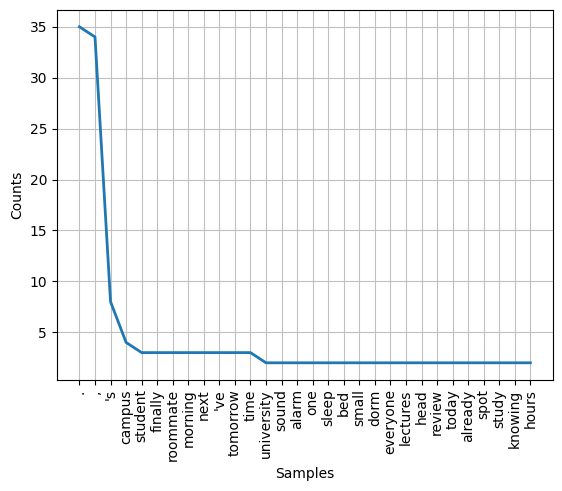

In [ ]:
frequency_distribution_1.plot(30, cumulative=False)

Повторим то же самое, только с учётом частеречных тэгов:

In [ ]:
tagged_words = nltk.pos_tag(tokenized_txt, tagset='universal')

tagged_list = ['_'.join(tagged_w) for tagged_w in tagged_words]

resulting_text = ' '.join(tagged_list)

processed_tokens = word_tokenize(resulting_text.lower())

frequency_distribution_2 = FreqDist(processed_tokens)


<Axes: xlabel='Samples', ylabel='Counts'>

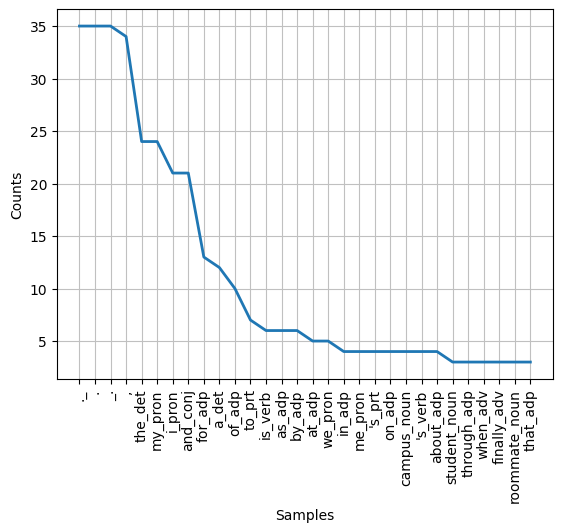

In [ ]:
frequency_distribution_2.plot(30, cumulative=False)

**Задание 1.** Извлеките ключевые слова из любых 2х текстов на английском и русском языке (не менее 4000 символов) тремя способами:  
    1) Используя просто токены;  
    2) Разметив на части речи;  
    3) Оставив только леммы или стеммы. Отличаются ли результат в топ-30?   
Визуализируйте с помощью frequency_distribution.plot. и библиотеки matplotlib

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Топ-30 слов (только токены):
[('said', 79), ('graveyard', 61), ('owens', 60), ('man', 44), ('child', 39), ('jack', 33), ('would', 29), ('could', 25), ('silas', 25), ('like', 23), ('hill', 22), ('little', 20), ('one', 19), ('knife', 14), ('book', 14), ('neil', 14), ('gaimon', 14), ('baby', 14), ('mother', 14), ('stranger', 14), ('see', 13), ('come', 13), ('something', 13), ('old', 13), ('back', 13), ('head', 11), ('night', 11), ('boy', 11), ('around', 11), ('side', 11)]


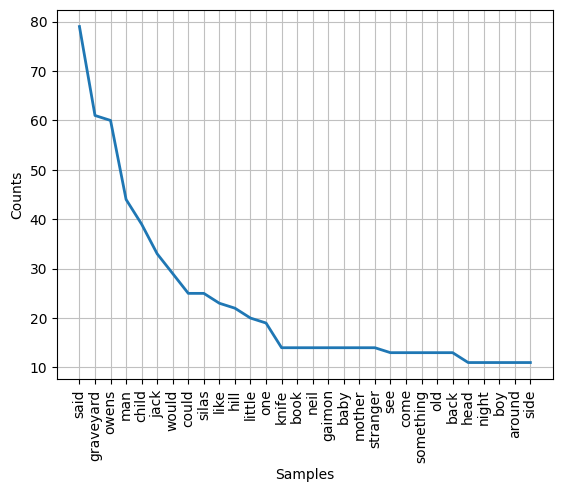

Топ-30 слов (+части речи):
[('said_VERB', 79), ('man_NOUN', 44), ('owens_NOUN', 43), ('graveyard_NOUN', 37), ('jack_NOUN', 32), ('would_VERB', 29), ('child_NOUN', 26), ('could_VERB', 25), ('little_ADJ', 19), ('silas_NOUN', 19), ('hill_NOUN', 15), ('book_NOUN', 14), ('neil_ADJ', 13), ('something_NOUN', 13), ('old_ADJ', 13), ('baby_NOUN', 12), ('graveyard_ADV', 12), ('owens_VERB', 12), ('come_VERB', 11), ('night_NOUN', 11), ('back_ADV', 11), ('time_NOUN', 11), ('worthington_NOUN', 11), ('looked_VERB', 10), ('see_VERB', 10), ('head_NOUN', 10), ('child_ADJ', 10), ('mother_NOUN', 10), ('dead_ADJ', 10), ('stranger_NOUN', 10)]


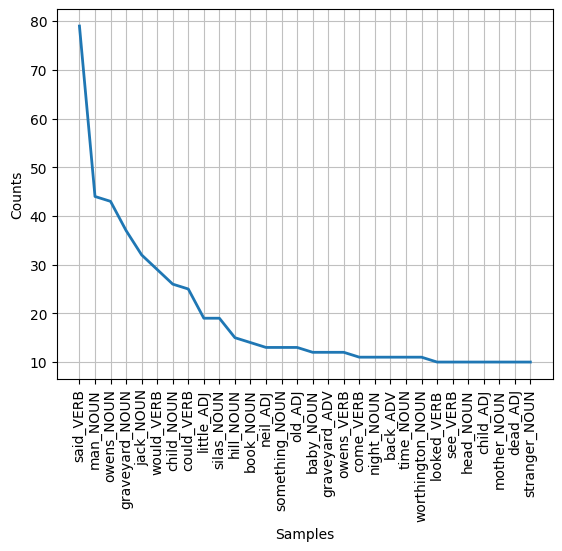

Топ-30 слов (леммы):
[('say', 84), ('graveyard', 61), ('owen', 48), ('man', 44), ('child', 39), ('jack', 33), ('look', 30), ('would', 29), ('could', 25), ('silas', 25), ('come', 24), ('like', 23), ('hill', 22), ('see', 21), ('little', 20), ('one', 19), ('go', 19), ('take', 17), ('owens', 17), ('gate', 15), ('knife', 14), ('book', 14), ('neil', 14), ('gaimon', 14), ('baby', 14), ('side', 14), ('think', 14), ('mother', 14), ('stranger', 14), ('hand', 13)]


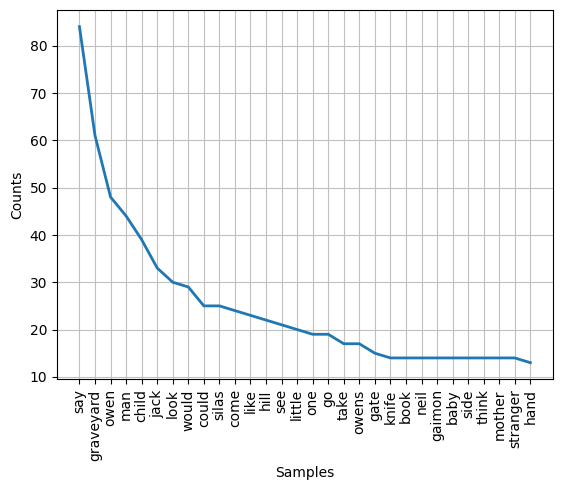

In [ ]:
import re
from nltk.tokenize import word_tokenize
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('omw-1.4')

text = "graveyardbook.txt"
with open(text, 'r', encoding='utf-8') as file:
    txt = file.read()

# ситуция 1 извлекаем ключевые слова, используя просто токены
tokenized_txt = word_tokenize(txt)

stop_words = set(stopwords.words("english"))
filtered_tokens = [word.lower() for word in tokenized_txt if word.isalpha() and word.lower() not in stop_words]

frequency_distribution_1 = FreqDist(filtered_tokens)

print("Топ-30 слов (только токены):")
print(frequency_distribution_1.most_common(30))
frequency_distribution_1.plot(30, cumulative=False)
plt.show()

# ситуция 2 извлекаем ключевые слова, разметив на части речи
tagged_words = nltk.pos_tag(filtered_tokens, tagset='universal')

tagged_list = [f"{word}_{pos}" for word, pos in tagged_words if pos in ('NOUN', 'VERB', 'ADJ', 'ADV')]

frequency_distribution_2 = FreqDist(tagged_list)

print("Топ-30 слов (+части речи):")
print(frequency_distribution_2.most_common(30))
frequency_distribution_2.plot(30, cumulative=False)
plt.show()

# ситуция 3 извлекаем ключевые слова, оставив только леммы или стеммы
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(pos))
                     for word, pos in tagged_words]

frequency_distribution_3 = FreqDist(lemmatized_tokens)

print("Топ-30 слов (леммы):")
print(frequency_distribution_3.most_common(30))
frequency_distribution_3.plot(30, cumulative=False)
plt.show()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Топ-30 слов (только токены):
[('язык', 56), ('языка', 29), ('например', 22), ('языков', 19), ('также', 18), ('языке', 16), ('африкаанс', 15), ('человек', 13), ('это', 12), ('языком', 11), ('млн', 10), ('слова', 10), ('других', 9), ('носителей', 9), ('диалектов', 9), ('арамейского', 9), ('однако', 9), ('слово', 9), ('говорят', 8), ('используются', 8), ('буквы', 8), ('букв', 8), ('время', 8), ('баскского', 8), ('баскский', 8), ('которые', 7), ('наряду', 7), ('слов', 7), ('действия', 7), ('арамейский', 7)]


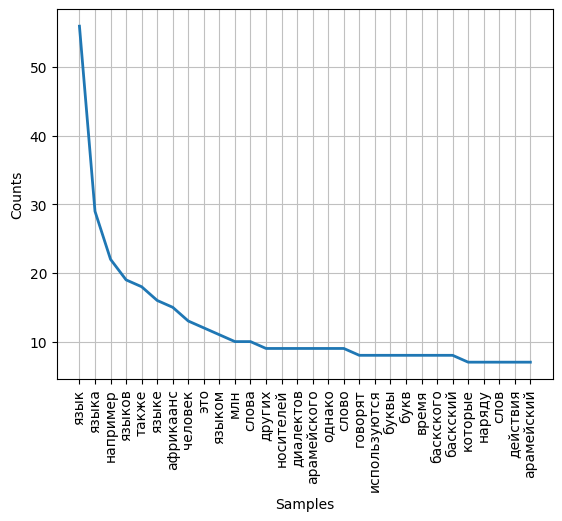

Топ-30 слов (+части речи):
[('язык_S', 56), ('языка_S', 29), ('г_S', 25), ('например_ADV', 22), ('языков_S', 19), ('также_ADV', 18), ('языке_S', 16), ('африкаанс_S', 15), ('человек_S', 13), ('языком_S', 11), ('слова_S', 10), ('н_S', 10), ('э_S', 10), ('носителей_S', 9), ('диалектов_S', 9), ('арамейского_A', 9), ('е_S', 9), ('слово_S', 9), ('говорят_V', 8), ('используются_V', 8), ('х_S', 8), ('буквы_S', 8), ('букв_S', 8), ('время_S', 8), ('баскского_A', 8), ('баскский_A', 8), ('наряду_ADV', 7), ('слов_S', 7), ('м_S', 7), ('действия_S', 7)]


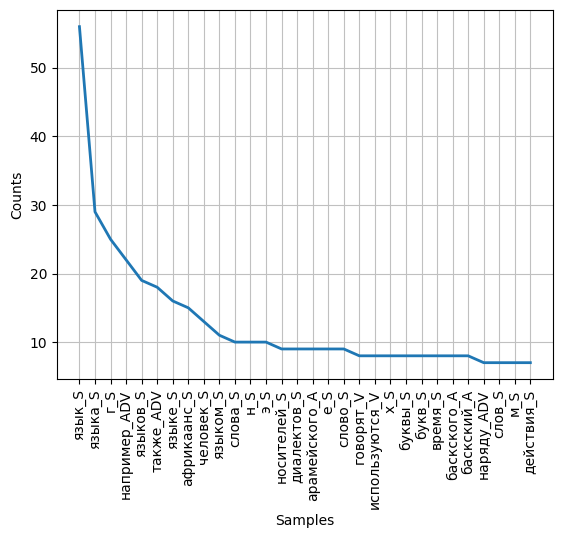

Топ-30 слов (леммы):
[('язык', 147), ('слово', 29), ('г', 25), ('баскский', 25), ('арабский', 22), ('диалект', 22), ('например', 22), ('арамейский', 21), ('литературный', 19), ('также', 18), ('согласный', 18), ('письмо', 18), ('человек', 17), ('буква', 17), ('говорить', 16), ('гласный', 16), ('белорусский', 16), ('африкаанс', 15), ('носитель', 14), ('использоваться', 14), ('время', 13), ('глагол', 13), ('называть', 12), ('книга', 12), ('русский', 12), ('е', 12), ('бенгальский', 12), ('страна', 11), ('территория', 11), ('алфавит', 11)]


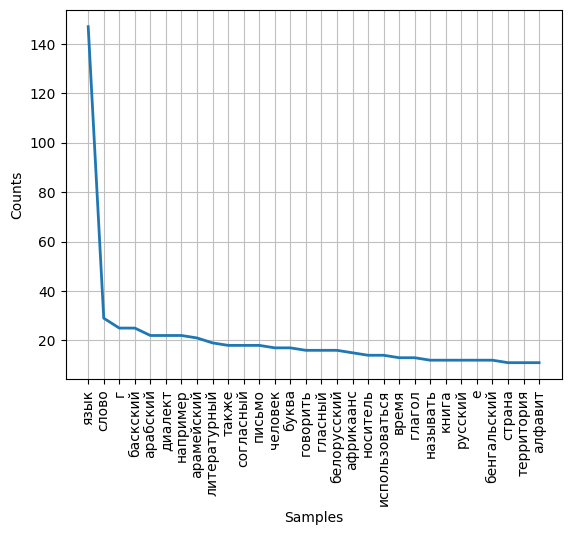

In [87]:
from pymystem3 import Mystem
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
import re
import matplotlib.pyplot as plt

nltk.download('punkt_tab')
nltk.download('stopwords')

mystem = Mystem()

text_rus = "lingnonfic.txt"
with open(text_rus, 'r', encoding='utf-8') as file:
    txt = file.read().lower()

# ситуция 1 извлекаем ключевые слова, используя просто токены
text_tokens_nltk = word_tokenize(txt)

tokens = [
    token for token in text_tokens_nltk
    if re.fullmatch(r'[а-яё]+', token.lower())
]

stop_words_ru = set(stopwords.words("russian"))

filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words_ru]

frequency_distribution_1 = FreqDist(filtered_tokens)

print("Топ-30 слов (только токены):")
print(frequency_distribution_1.most_common(30))
frequency_distribution_1.plot(30, cumulative=False)
plt.show()

# ситуция 2 извлекаем ключевые слова, разметив на части речи
text_analyzed = mystem.analyze(txt)

ALLOWED_POS = {'S', 'A', 'V', 'ADV'}

def process_mystem_analysis(analysis_results):

  result_tokens = []

  for item in analysis_results:
      if item.get('text', '').strip() == '' or 'analysis' not in item:
          continue

      token_text = item['text'].lower()

      if not re.fullmatch(r'[а-яё]+', token_text):
          continue

      if token_text in stop_words_ru:
          continue

      if 'analysis' in item and item['analysis']:
          first_analysis = item['analysis'][0]

          gr = first_analysis.get('gr', '')

          if not gr:
            continue

          pos_tag = gr.split(',')[0].split('=')[0]

          if pos_tag not in ALLOWED_POS:
              continue

      result_tokens.append(f"{token_text}_{pos_tag}")

  return result_tokens

tagged_tokens = process_mystem_analysis(text_analyzed)

frequency_distribution_2 = FreqDist(tagged_tokens)

print("Топ-30 слов (+части речи):")
print(frequency_distribution_2.most_common(30))
frequency_distribution_2.plot(30, cumulative=False)
plt.show()

# ситуция 3 извлекаем ключевые слова, оставив только леммы или стеммы
tokens_only = [token.split('_')[0] for token in tagged_tokens]

text_lemmatized = mystem.lemmatize(' '.join(tokens_only))

lemmatized_tokens = [tok for tok in text_lemmatized if re.fullmatch(r'[а-яё]+', tok)]

frequency_distribution_3 = FreqDist(lemmatized_tokens)

print("Топ-30 слов (леммы):")
print(frequency_distribution_3.most_common(30))
frequency_distribution_3.plot(30, cumulative=False)
plt.show()